In [1]:
import os
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate, build_logistic_classifier, post_processing_function, plot_beta_errors

ms = load_from_json(deepcopy(math_spec_json))

In [2]:
T = 50
blocks = ["Log Simulation Data Mechanism"] + ["Price Movements Wiring",
            "Conversions Wiring",
            "Mine Block Wiring",
            "Unlock Tokens Wiring",
            "Log Simulation Data Mechanism",] * T




            
experiment = {"Name": "Test",
               "Param Modifications": None,
               "State Modifications": None,
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[])

print(df)

Placeholder has no control action options
    Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0              NaN             NaN           -0.0001            0.0001   
1        -4.931016     -742.356828           -0.0001            0.0001   
2        -4.854810     -798.777097           -0.0001            0.0001   
3       -14.396173    -3952.606839           -0.0001            0.0001   
4        -4.953049     1132.820704           -0.0001            0.0001   
5        -5.022765     1942.204965           -0.0001            0.0001   
6       -14.188868    -2844.990523           -0.0001            0.0001   
7       -14.123167    -2378.789151           -0.0001            0.0001   
8       -14.083370    -2587.992720           -0.0001            0.0001   
9        -5.295589     1993.643810           -0.0001            0.0001   
10      -13.991544    -1894.250695           -0.0001            0.0001   
11       -5.451659     2727.318417           -0.0001            0.0001

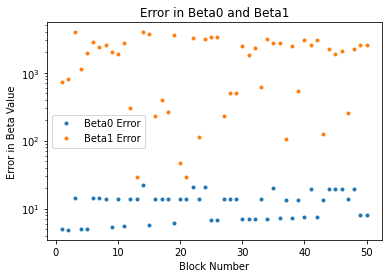

In [3]:
plot_beta_errors(df)

In [3]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Qi Supply,Quai Supply,Locked Qi Supply,Locked Quai Supply,Block Number,Block Difficulty,Number of Regions,Zones per Region,K Qi,K Quai,Quai Price,Qi Price,Time,Delta Time,Mined Ratio
0,NaN,NaN,-0.0001,0.0001,0.000000e+00,3.000000e+09,0.000000e+00,2.370000e+09,0,6000,2,2,1.000000,1,1.000000,1.000000,0.000000,0,NaN
1,-4.941025,-2762.834084,-0.0001,0.0001,3.189213e+09,2.999387e+09,3.189213e+09,2.255833e+09,1,6000,2,2,0.735246,1,0.956548,0.948201,94.962106,0,0.003582
2,4.815724,1205.957640,-0.0001,0.0001,3.189244e+09,2.999387e+09,3.189244e+09,2.217778e+09,2,6000,2,2,0.647506,1,0.912675,0.924439,142.788317,0,0.003693
3,4.741488,1704.805760,-0.0001,0.0001,3.189275e+09,2.999387e+09,3.189275e+09,2.179722e+09,3,6000,2,2,0.535610,1,0.864542,0.901747,174.982648,0,0.003183
4,4.678704,1481.821636,-0.0001,0.0001,3.189304e+09,2.999387e+09,3.189304e+09,2.141667e+09,4,6000,2,2,0.454531,1,0.840743,0.885375,198.976713,0,0.003008
5,-4.676255,-3917.536732,-0.0001,0.0001,3.189318e+09,2.999387e+09,3.189318e+09,2.103611e+09,5,6000,2,2,0.272223,1,0.804882,0.882336,218.208973,0,0.010236
6,4.506947,137.942342,-0.0001,0.0001,3.189329e+09,2.999387e+09,3.189329e+09,2.103612e+09,6,6000,2,2,0.268231,1,0.751019,0.867627,234.247851,0,0.009619
7,-4.526550,-3154.507699,-0.0001,0.0001,3.189344e+09,2.999387e+09,3.189344e+09,2.065556e+09,7,6000,2,2,0.179215,1,0.706761,0.847134,247.902090,0,0.005992
8,-4.462857,-2484.068886,-0.0001,0.0001,3.189353e+09,2.999387e+09,3.189352e+09,2.065556e+09,8,6000,2,2,0.130488,1,0.674891,0.835915,260.197765,0,0.011343
9,-4.393270,-1403.917235,-0.0001,0.0001,3.189360e+09,2.999387e+09,3.189360e+09,2.065556e+09,9,6000,2,2,0.110681,1,0.647808,0.842138,270.787284,0,0.012197


In [4]:
T = 100
blocks = ["Log Simulation Data Mechanism"] + ["Price Movements Wiring",
            "Conversions Wiring",
            "Mine Block Wiring",
            "Unlock Tokens Wiring",
            "Log Simulation Data Mechanism",] * T




            
experiment = {"Name": "Test",
               "Param Modifications": None,
               "State Modifications": None,
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[])

Placeholder has no control action options
